---
title: Synchronized Colors in Python Plots
author: Kunlei Lian
date: 02/29/2024
categories:
  - Python
  - Matplotlib
jupyter: 'blog'
format:
  html:
    code-line-numbers: true
    code-overflow: wrap
    code-block-bg: true
    code-block-border-left: true
    highlight-style: Arrow
---

Today I came across a case for which I need put two figures side by side and I would like to use the same color to indicate the same element across the figures.
After some searching on the internet, here is the solution I settled on.

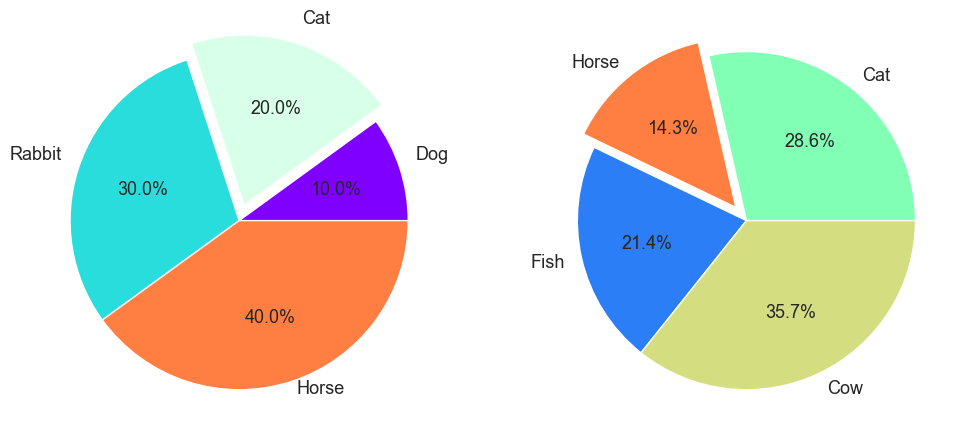

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data_a = pd.Series(data=[1, 2, 3, 4], index=['Dog', 'Cat', 'Rabbit', 'Horse'])
data_b = pd.Series(data=[4, 2, 3, 5], index=['Cat', 'Horse', 'Fish', 'Cow'])

index_set = set()
index_set.update(data_a.index)
index_set.update(data_b.index)

cm = plt.get_cmap('rainbow')
colors = [cm(1.0 * i / len(index_set)) for i in range(len(index_set))]
color_dict = {label: color for label, color in zip(index_set, colors)}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

patches, texts, autotexts = axes[0].pie(data_a,
            labels=data_a.index,
            colors=[color_dict[label] for label in data_a.index],
            explode=[0, 0.1, 0, 0],
            autopct='%.1f%%',
            textprops={'fontsize': 13}
            )

patches[1].set_alpha(0.3)
# patches[2].set_visible(False)
for text in texts:
    text.set_verticalalignment('bottom')


patches, texts, autotexts = axes[1].pie(data_b,
            labels=data_b.index,
            colors=[color_dict[label] for label in data_b.index],
            explode=[0, 0.1, 0, 0],
            autopct='%.1f%%',
            textprops={'fontsize': 13}
            )
    
# hole = plt.Circle((0, 0), 0.65, facecolor='white')
# plt.gcf().gca().add_artist(hole)

I also stumbled on how to make a donut chart:

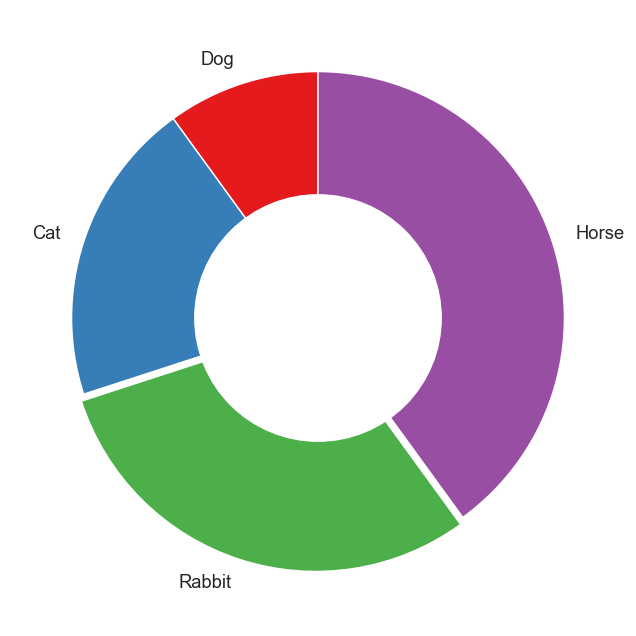

In [56]:
fig, ax = plt.subplots(1, figsize=(8, 8))
 
ax.pie(
    x=data_a, 
    labels=data_a.index,
    colors=sns.color_palette('Set1'),
    explode=[0, 0, 0.03, 0],
    startangle=90
)
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)